In [1]:
import os
import cv2
import numpy as np
from keras.models import model_from_json
import matplotlib.pyplot as plt

In [2]:
def loaddata():
    json_file = open('model.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights("model.h5")
    return loaded_model

In [3]:
model=loaddata()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 128, 128, 32)      416       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 128, 128, 32)      4128      
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 64)        8256      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 64)       

In [4]:
# root directory path for image dataset
path = "D:/Image_datasets/breast_cancer_image_dataset/Dataset_BUSI_with_GT/"
# make sure root folder contains segmanted data folders"


# view directory tree
def tree_printer(root):
    print("🗁",root)
    for root, dirs, files in os.walk(root):
        for d in dirs:
            print(" |- 🗁",d," "*2+"象",len(os.listdir(os.path.join(root, d))),"items")
            
tree_printer(path)

🗁 D:/Image_datasets/breast_cancer_image_dataset/Dataset_BUSI_with_GT/
 |- 🗁 benign   象 891 items
 |- 🗁 malignant   象 421 items
 |- 🗁 normal   象 266 items


In [15]:
def prepare_image_target(path,result):
    img=cv2.imread(path)
    plt.imshow(img)
    print(img.dtype)
#     img=crop_contour_img(img,True)
    img=cv2.resize(img,(128,128))
    img=np.array(img)
    print(img.shape)
    img=img.reshape(1,128,128,3)
    if result=="yes":
        return [img,np.array([1.,0.])]
    else:
        return [img,np.array([[0.,1.]])]
    
    
    

uint8
(128, 128, 3)
predicted : [[1. 0.]] | Actual : [1. 0.]


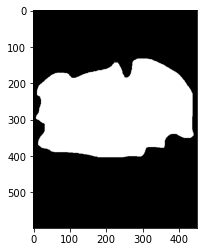

In [16]:
test_img,test_target=prepare_image_target(path+"/malignant/malignant (1)_mask.png","yes")
test_pred=model.predict_on_batch(test_img)

print("predicted :",test_pred,"| Actual :",test_target)
# analysis_nn_pred(test_pred,test_target,["tumor","No tumor"])